# Gradient Descent

Makine Öğrenmesi için çok önemli olan Gradient Descent konusunu öğreneceğiz.

Gradient Descent neredeyse bütün ML algoritmaları için kullanılır ve Gradient Descent', ML algortimalarının nasıl işlediğini anlamanız için hayati önemdedir.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Rastgele veri oluşturuyoruz
X= 2 * np.random.rand(100,1)
X

array([[1.03877495],
       [0.73004379],
       [0.54042589],
       [1.57370859],
       [1.05761841],
       [0.07928162],
       [0.17430702],
       [1.49596823],
       [1.87420326],
       [1.35486486],
       [0.03002624],
       [1.66681188],
       [0.96291378],
       [1.22206362],
       [1.90842551],
       [1.31924188],
       [1.45182137],
       [1.91826906],
       [0.89169024],
       [0.6380988 ],
       [0.12418887],
       [0.136892  ],
       [1.98689645],
       [0.4854442 ],
       [1.1323649 ],
       [1.30407732],
       [1.34247041],
       [1.55128312],
       [0.36349028],
       [1.17309265],
       [0.25201777],
       [0.77776182],
       [0.26752035],
       [1.67907141],
       [0.79441698],
       [0.62079083],
       [1.43439295],
       [0.43596053],
       [0.35476414],
       [0.96403504],
       [0.37045057],
       [0.47188762],
       [1.04298278],
       [0.84840331],
       [1.40268032],
       [0.8601922 ],
       [1.22716162],
       [1.888

In [3]:
#normalde X ile y arasındaki ilişkiyi bilmeyiz ama burada biliyoruz
#birazdan bu katsayıları bilmediğimizi farzederek onları bulmaya çalışacağız

y= 4 + 3 *X + np.random.rand(100,1)
y

array([[ 7.46099064],
       [ 6.20574925],
       [ 6.19050772],
       [ 9.03124661],
       [ 8.15231963],
       [ 4.28791593],
       [ 5.26301385],
       [ 8.99115199],
       [10.04950965],
       [ 8.58211599],
       [ 4.73617149],
       [ 9.25369797],
       [ 7.28062237],
       [ 7.82438826],
       [10.38462422],
       [ 8.20110482],
       [ 8.73211552],
       [ 9.97727793],
       [ 7.06197962],
       [ 6.0079448 ],
       [ 4.84758157],
       [ 4.64716651],
       [10.35668334],
       [ 5.684913  ],
       [ 7.50389497],
       [ 8.84163037],
       [ 8.50838396],
       [ 9.25319273],
       [ 5.86068087],
       [ 7.93399456],
       [ 4.77588642],
       [ 7.25524296],
       [ 5.49801328],
       [10.009686  ],
       [ 7.19078873],
       [ 6.61616841],
       [ 9.27629351],
       [ 5.93375127],
       [ 5.35346826],
       [ 7.34376217],
       [ 5.91583885],
       [ 6.18318122],
       [ 7.16864989],
       [ 6.85681504],
       [ 9.17101744],
       [ 6

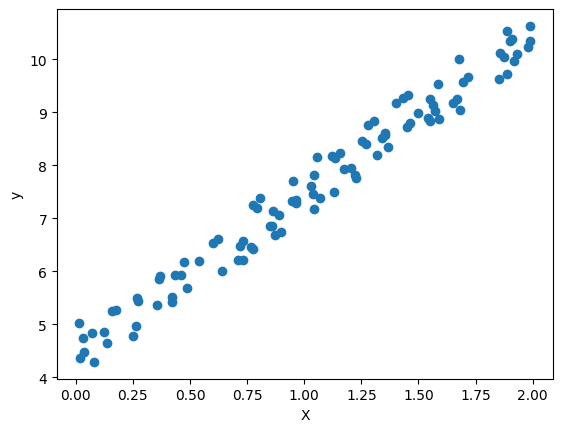

In [4]:
# y ile X arasında lineer bir ilişki var.
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [5]:
# Maliyet (Cost) Hesaplama Fonksiyonu

def cal_cost(W,X,y):
    """
    X ve y için Cost (Maliyet) hesaplar.
    Parametreler:
    W = Katsayı vektörü -> (p, 1)
    X = Girdi vektörü   -> (n, p)
    y = Gerçek y'ler    -> (n, 1)
    Burada:
    n: Toplam veri adedi (satır sayısı)
    p: X içindeki değişken adedi (sütun sayısı)
    
    Dönüş:
    cost = hesaplanan maliyet değeri
    """
    n= len(y) #formül için alınıyor
    
    # önce tahmini hesapla -> 𝑦̂ = X W
    # X -> (n, p)
    # W -> (p, 1)
    # 𝑦̂ -> (n, 1)
    
    tahmin= X.dot(W) 
    """
    dot fonksiyonu, matris çarpımını veya vektör iç çarpımını gerçekleştiren bir fonksiyondur. 
    Bu fonksiyon, iki NumPy dizisini (array) çarparak yeni bir dizi üretir.
    Bu ifade, veri kümesindeki girdi değerlerini (genellikle "X" olarak gösterilir) bir ağırlık matrisiyle (genellikle "W" olarak gösterilir) 
    çarparak tahmin değerlerini hesaplamak için kullanılan bir ifadedir. Bu adım, genellikle bir modelin çıktı değerini (tahminini) oluştururken kullanılır.
    Ağırlık matrisi modelin öğrenilecek parametrelerini içerir.
    """
    # cost function değerini hesapla -> J
    cost= (1/2*n) * np.sum(np.square(tahmin-y)) #formül bu
    
    # maliyet (cost) değerini dön
    return cost

In [8]:
# Gradient Descent Fonksiyonu
def gradient_descent(X,y,W, learning_rate=0.01, iteration=100):
    
    """
    Gradient Descent uygulama fonksiyonu.
    Parametreler:
    X = X Matrisi (bias unit eklenmiş hali, yani 1'lerden oluşmuş ilk sütun)
    y = y vektörü
    W = Katsayı vektörü (w'lardan oluşmuş)
    learning_rate = learning rate: alpha (öğrenme katsayısı)
    iterations = toplam döngü sayısı
    Dönüş:
    * W vektörünün son hali
    * Maliyet Listesi (cost history)
    * W vektörünün listesi (weight history)
    """   
    n=len(y)
    #np.zeros ile bir dizi oluşturulur
    cost_history= np.zeros(iteration) #cost_history= costun değişimini göreceğiz, bu dizi iterasyon sayısı kdr sayıya sahip olacak
    w_history= np.zeros((iteration, 2)) #Bununda değişimini göreceğiz ama bunlar 2 boyutlu yani 2 tane sütunu var içinde (w0 ve w1)
    
    for it in range(iteration):
        
        tahmin= np.dot(X,W)#her bir döngüde o anki tahmini (x ve wların çarpımını) gösteriyor.
        
        #gradient descent formülü:
        W= W- (1/n) * learning_rate * (X.T.dot((tahmin-y)))#T=transpozunu almak (X.T) ve bu transpoze diziyi başka bir diziyle nokta çarpımı (dot) yapmak amacıyla kullanılır.
        #Bu ifade, tahmin hataları vektörünün X matrisinin transpozu ile matris çarpımını hesaplar. Sonuç, model parametrelerinin güncellenmesi için kullanılan gradyan vektörünü temsil eder.        
        
        w_history[it,:]= W.T
        
        cost_history[it]= cal_cost(W,X,y)
        
    return W, cost_history, w_history

In [13]:
#burada random bir W buluyoruz ve başlangıç sayısı olarak kabul ediyoruz A noktası
W= np.random.rand(2,1)#2 satır bir sütun
print(W)

[[0.65133691]
 [0.09848167]]


In [15]:
lr= 0.01

In [16]:
n_iter=1000 #toplam iterasyon

In [17]:
X

array([[1.03877495],
       [0.73004379],
       [0.54042589],
       [1.57370859],
       [1.05761841],
       [0.07928162],
       [0.17430702],
       [1.49596823],
       [1.87420326],
       [1.35486486],
       [0.03002624],
       [1.66681188],
       [0.96291378],
       [1.22206362],
       [1.90842551],
       [1.31924188],
       [1.45182137],
       [1.91826906],
       [0.89169024],
       [0.6380988 ],
       [0.12418887],
       [0.136892  ],
       [1.98689645],
       [0.4854442 ],
       [1.1323649 ],
       [1.30407732],
       [1.34247041],
       [1.55128312],
       [0.36349028],
       [1.17309265],
       [0.25201777],
       [0.77776182],
       [0.26752035],
       [1.67907141],
       [0.79441698],
       [0.62079083],
       [1.43439295],
       [0.43596053],
       [0.35476414],
       [0.96403504],
       [0.37045057],
       [0.47188762],
       [1.04298278],
       [0.84840331],
       [1.40268032],
       [0.8601922 ],
       [1.22716162],
       [1.888

In [18]:
"""
"Bias" terimi, bir modelin veya tahminin gerçek değerlerden veya hedef 
değerlerden ne kadar sapabileceğini ifade eden bir terimdir. Bir modelin 
bias'ı, tahminlerinin genellikle ne kadar yanlış (doğrudan sapmış) veya 
yanıltıcı olduğunu gösterir. Bias, modelin daha karmaşık yapıları 
yakalayamadığı veya veri setine göre yeterince esnek olamadığı durumlarda 
ortaya çıkabilir. Bir modelde yüksek bias, düşük model karmaşıklığına veya
aşırı basit bir modele işaret edebilir.
"""
#r veri seti üzerinde lineer regresyon uygulamadan önce veri setini işlemek için kullanılan önemli bir adım:
n=len(X)

#W0 ve W1 var. W0 sabit sayı bu yüzden X'e bir sütun ekleriz.
X_b= np.c_[np.ones((n,1)), X]
"""
np.ones() NumPy (Numerical Python) kütüphanesindeki bir fonksiyondur ve belirtilen 
boyutlarda birlerden oluşan bir numpy dizisi oluşturur. X_b= np.c_[np.ones((n,1)), X]: 
Bu satır, bağımlı değişken matrisi X'i bir sabit terim (bias veya intercept) ile genişletir. 
Bu, lineer regresyon modelinde bias'ı ifade eden terimi eklemek için kullanılır. 
np.ones((n, 1)): n satır ve 1 sütundan oluşan bir birler matrisi oluşturur. Bu birler matrisi,
her bir veri noktası için bir tane sabit terim (bias) eklemek için kullanılır. 
Örnek olarak, veri setindeki her bir örnek için bir tane bir ekler.
np.c_[]: Bu numpy fonksiyonu, verilen matrisleri sütunlarına göre birleştirir. Burada birler
matrisi ve bağımlı değişken matrisi X birleştirilir. Birler matrisi, her bir veri noktası için bir sabit terim (bias) içerir.
X_b: Oluşturulan genişletilmiş veri matrisi. Her bir veri noktası için bir sabit terim (bias) ve bağımlı değişkenleri içerir.
"""

print(X_b)

[[1.         1.03877495]
 [1.         0.73004379]
 [1.         0.54042589]
 [1.         1.57370859]
 [1.         1.05761841]
 [1.         0.07928162]
 [1.         0.17430702]
 [1.         1.49596823]
 [1.         1.87420326]
 [1.         1.35486486]
 [1.         0.03002624]
 [1.         1.66681188]
 [1.         0.96291378]
 [1.         1.22206362]
 [1.         1.90842551]
 [1.         1.31924188]
 [1.         1.45182137]
 [1.         1.91826906]
 [1.         0.89169024]
 [1.         0.6380988 ]
 [1.         0.12418887]
 [1.         0.136892  ]
 [1.         1.98689645]
 [1.         0.4854442 ]
 [1.         1.1323649 ]
 [1.         1.30407732]
 [1.         1.34247041]
 [1.         1.55128312]
 [1.         0.36349028]
 [1.         1.17309265]
 [1.         0.25201777]
 [1.         0.77776182]
 [1.         0.26752035]
 [1.         1.67907141]
 [1.         0.79441698]
 [1.         0.62079083]
 [1.         1.43439295]
 [1.         0.43596053]
 [1.         0.35476414]
 [1.         0.96403504]


In [19]:
W_final, cost_history, w_history = gradient_descent(X_b, y, W, lr, n_iter)

In [20]:
print('W final:', W_final)

W final: [[4.27058154]
 [3.16019252]]


In [21]:
print('Cost History:', cost_history)

Cost History: [236662.81091311 226116.04489973 216041.63893475 206418.43290694
 197226.21461813 188445.67731938 180058.37914932 172046.70438968
 164393.82645632 157083.67254827 150100.88988035 143430.81342843
 137059.43511972 130973.37440314 125159.85013811 119606.65374265
 114302.12354436 109235.12028036 104395.00369485  99771.61018497
  95355.23144807  91136.59408555  87106.84012036  83257.50838732
  79580.51675697  76068.14515593  72713.01934774  69508.09544033
  66446.64508756  63522.24135361  60728.74521065  58060.29264137
  55511.28231927  53076.36384087  50750.42648503  48528.58847588
  46406.18672671  44378.76704327  42442.07476602  40592.04583154
  38824.7982343   37136.62387103  35523.98075036  33983.4855515
  32511.9065162   31106.15665922  29763.28728288  28480.48178215
  27255.0497273   26084.42121161  24966.14145223  23897.86563299
  22877.35397821  21902.46704714  20971.16123928  20081.48450098
  19231.57222442  18419.64333026  17643.99652581  16903.00673082
  16195.1216

In [22]:
print('Initial Cost:', cost_history[0]) #ilk değer
print('Final Cost:', cost_history[-1])#son değer

Initial Cost: 236662.81091310858
Final Cost: 451.5261859727235


In [23]:
# W_0'ın ilk hali
W_0 = W[0]
print('W_0:', W_0)

# W_0'ın son hali
W_0_final = W_final[0]
print('W_0_final:', W_0_final)

W_0: [0.65133691]
W_0_final: [4.27058154]


In [24]:
# W_1'in ilk hali
W_1 = W[1]
print('W_1:', W_1)

# W_1'in son hali
W_1_final = W_final[1]
print('W_1_final:', W_1_final)

W_1: [0.09848167]
W_1_final: [3.16019252]


## Learning Rate

In [25]:
# Maliyet Değişimini çizen fonksiyon

def cost_vs_iterations(cost_history, n_iter):
    
    fig, ax = plt.subplots(figsize=(12,8))

    plt.plot(range(n_iter), cost_history)

    plt.xlabel('Iterations')
    plt.ylabel('J(W)')
    plt.title('MALİYET - ITERASYON')
    plt.grid()
    plt.show()

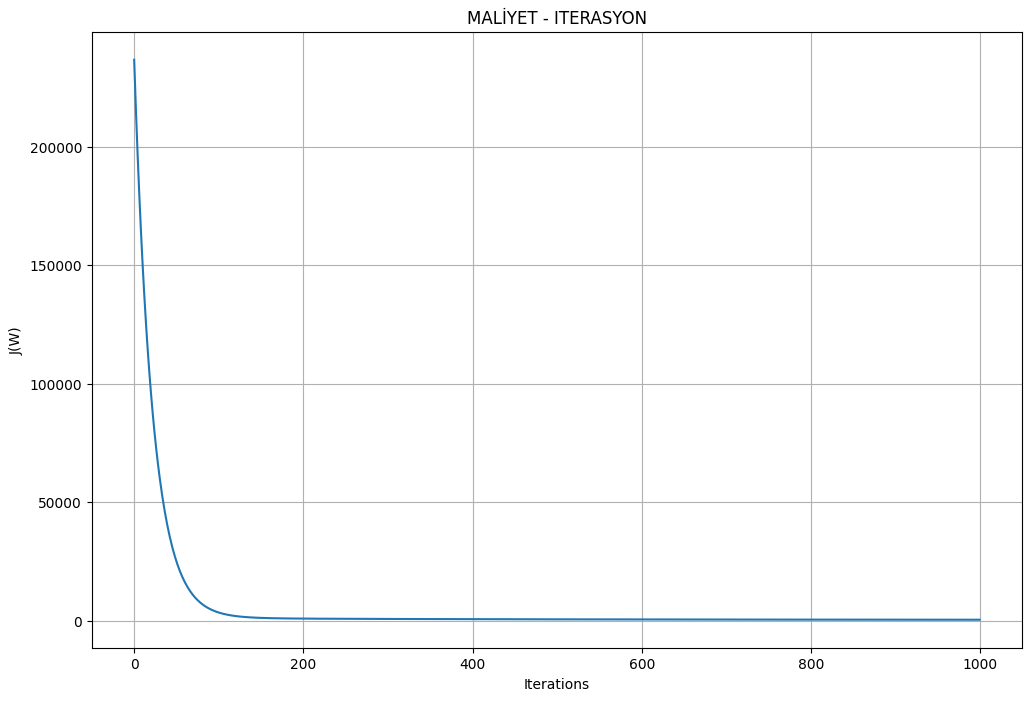

In [26]:
"""
Başlarda katsayılar büyük olduğu için hızlı azalıyor sonra katsayılar küçülüyor 
bi yerden sonra sabitleniyor. Azalmasının sebebi a ile çarpıp kendiisinden çıkarmamız.
Gradient de küçülüyor.
"""
cost_vs_iterations(cost_history, n_iter)



In [27]:
#şimdi gradienti çağıran ve grafiği çizdirien bir fonksiyon yazalım:

def call_gradient(learning_rate, n_iter):
    
    # Bu learning_rate ve n_iter için maliyet değerlerini al
    W_final, cost_history, w_history = gradient_descent(X_b, y, W, learning_rate, n_iter)
    
    # bu maliyet değerlerine göre çizim yap
    cost_vs_iterations(cost_history, n_iter)   

**Deney 1:** Learning rate aynı olsun **alpha = 0.01** ama iterasyon sayısını artıralım: 2000

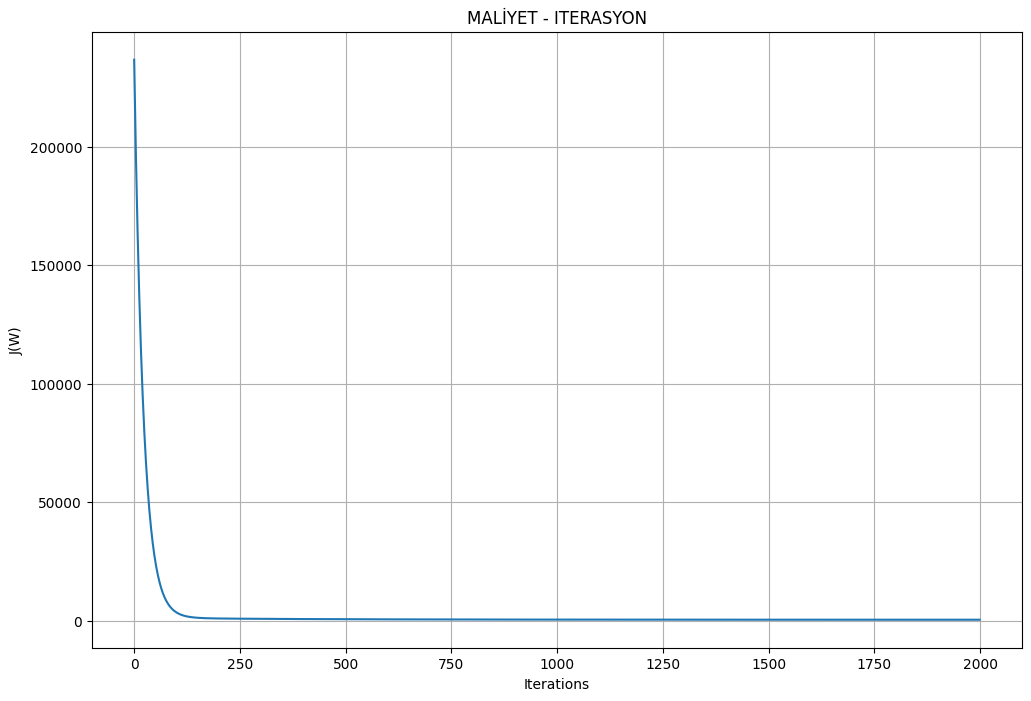

In [28]:
# learning_rate = 0.01
# n_iter = 2000

learning_rate = 0.01
n_iter = 2000
call_gradient(learning_rate, n_iter)

#burada iterasyon değerini değiştirmek bir işe yaramadı çünkü öncesinde 1000e kdr gemeden zaten bulmuştu

**Sonuç:** Gördüğünüz gibi, hiçbir şey değişmedi. Çünkü zaten 180'inci iterasyon dolaylarında en iyi değerleri bulmuş oluyordu.

**Deney 2:** Iterasyon sayısı aynı (1000) olsun ama Learning rate'i artıralım **alpha = 0.05**

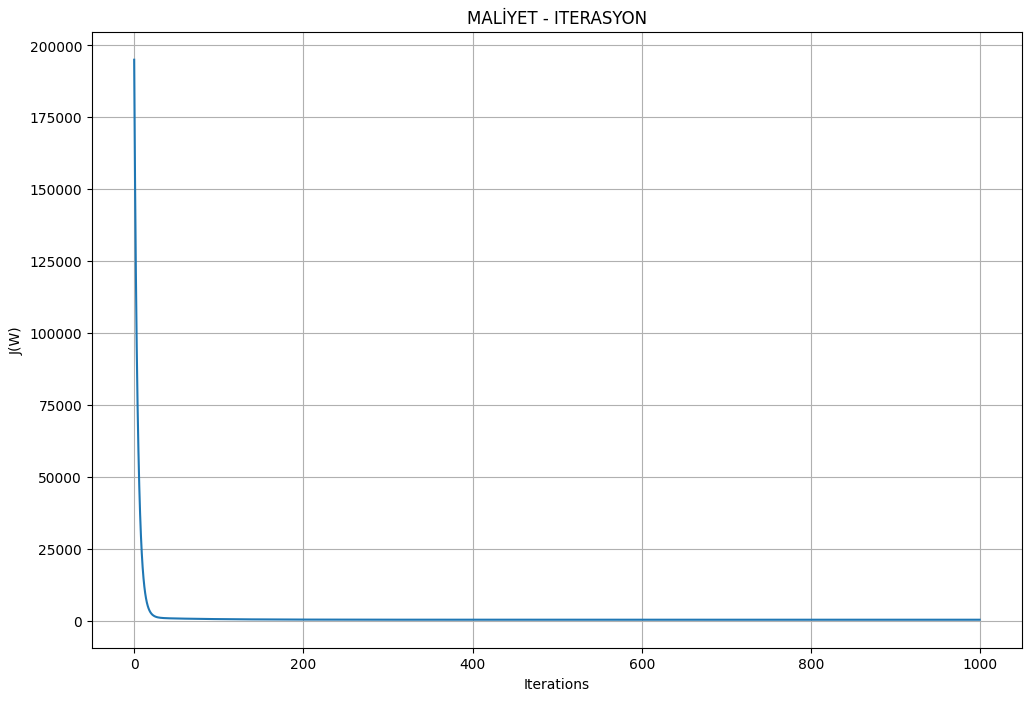

In [29]:
# learning_rate = 0.05
# n_iter = 1000

learning_rate = 0.05
n_iter = 1000
call_gradient(learning_rate, n_iter)

**Sonuç:** Gördüğünüz gibi, sonuca çok daha hızlı yaklaştı. Takriben 40. iterasyon gibi. Yani adım büyük olunca düşüşte hızlı oldu. Sonuca daha hızlı yaklaştık şimdi sonucu daha da düşürelim.

**Deney 3:** Iterasyon sayısı aynı (1000) olsun ama Learning rate'i artıralım **alpha = 0.1**

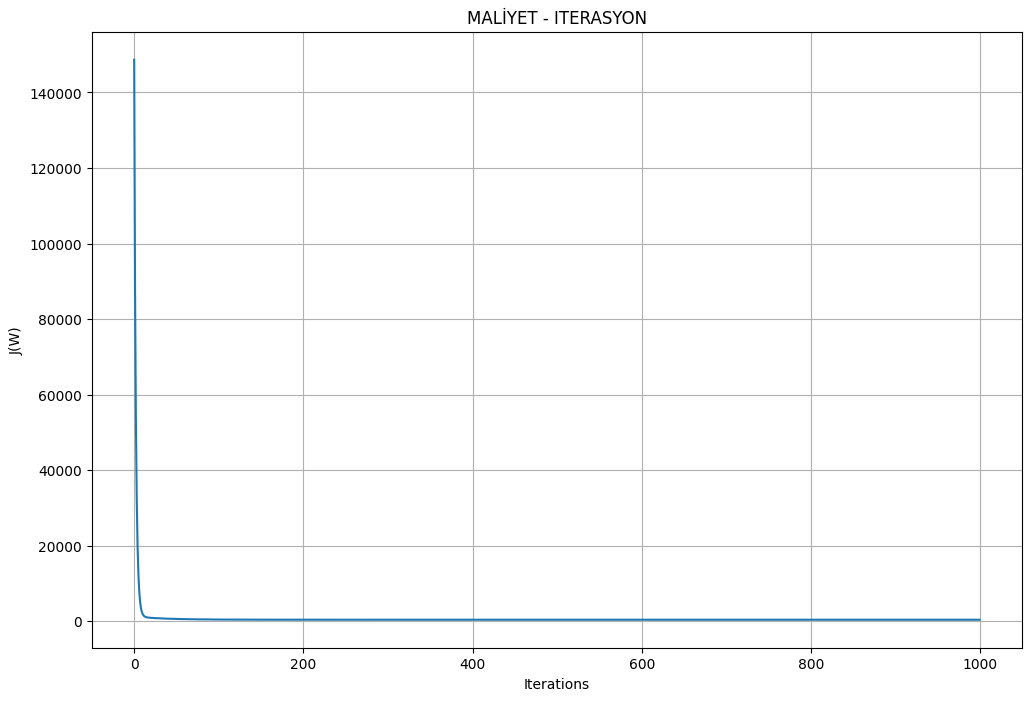

In [30]:
# learning_rate = 0.1
# n_iter = 1000

learning_rate = 0.1
n_iter = 1000
call_gradient(learning_rate, n_iter)

**Sonuç:** Gördüğünüz gibi, sonuca biraz daha hızlı yaklaştı. Takriben 20. iterasyon gibi.

**Deney 4:** Iterasyon sayısı aynı (1000) olsun ama Learning rate'i artıralım **alpha = 1**

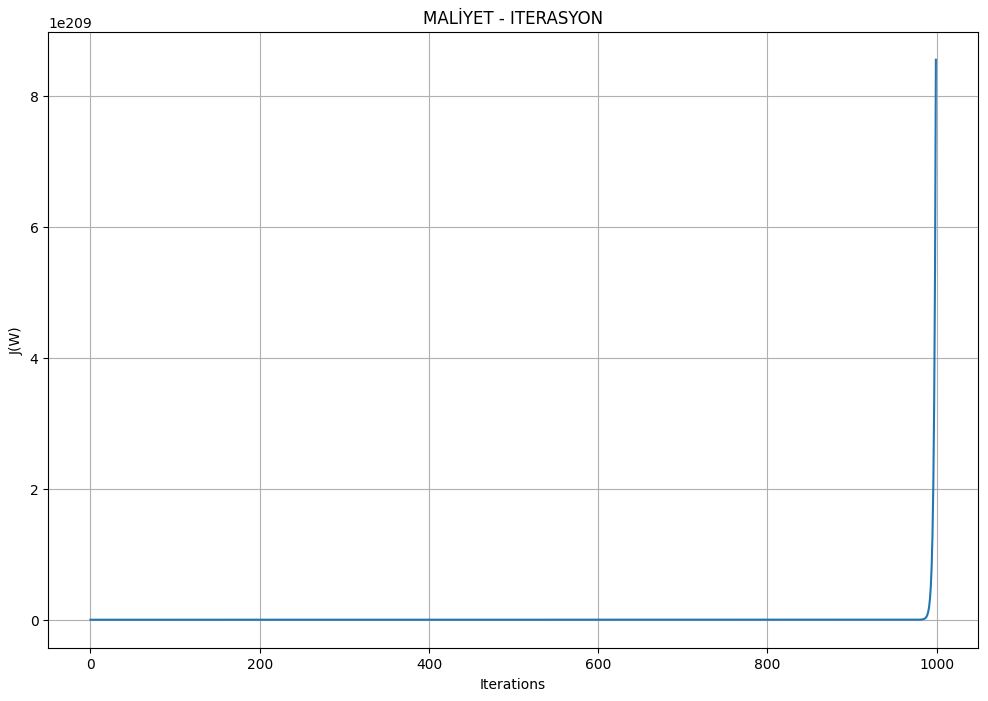

In [31]:
# learning_rate = 1
# n_iter = 1000

learning_rate = 1
n_iter = 1000
call_gradient(learning_rate, n_iter)

**Sonuç:** Bu sefer bırakın en iyi değeri bulmayı, maliyet belli bir yerden sonra çok hızlı arttı. Buna Overshoot deniyor, adım çok büyüktü bu yüzden hedef w değerini çok geçti sonra tersine döndü ve arttı. 

**Deney 5:** Iterasyon sayısı aynı (1000) olsun ama Learning rate'i küçültelim **alpha = 0.001**

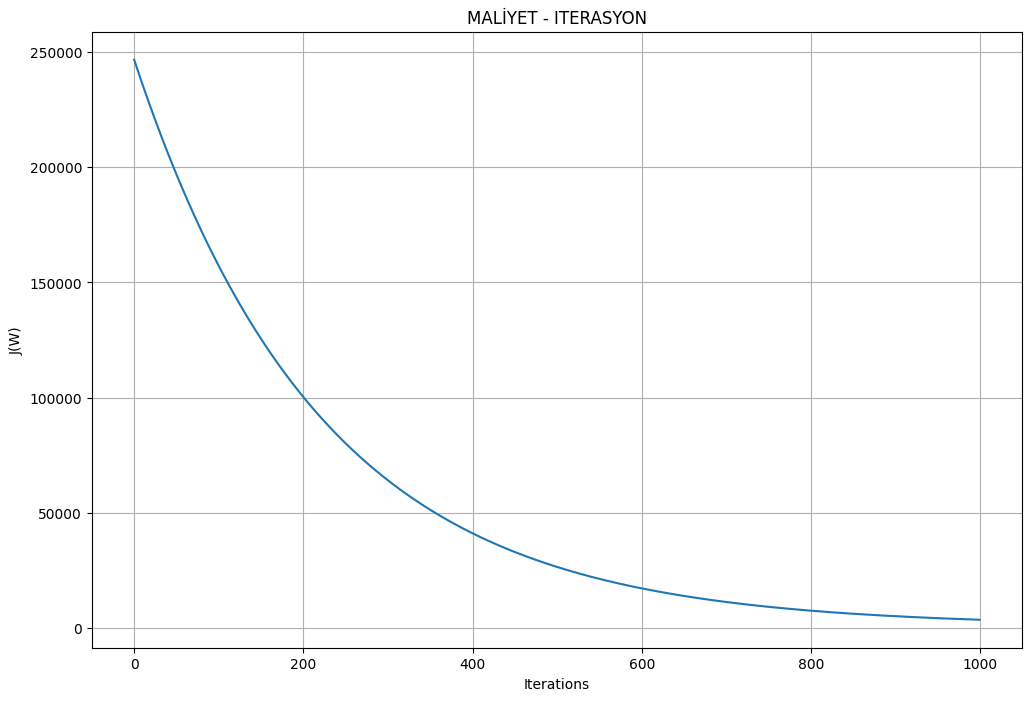

In [32]:
# learning_rate = 0.001
# n_iter = 1000

learning_rate = 0.001
n_iter = 1000
call_gradient(learning_rate, n_iter)

**Sonuç:** Fena değil, 1000. iterasyonda minimum bir değere geldik.

**Deney 5:** Iterasyon sayısı aynı (1000) olsun ama Learning rate'i daha da küçültelim **alpha = 0.0001** 

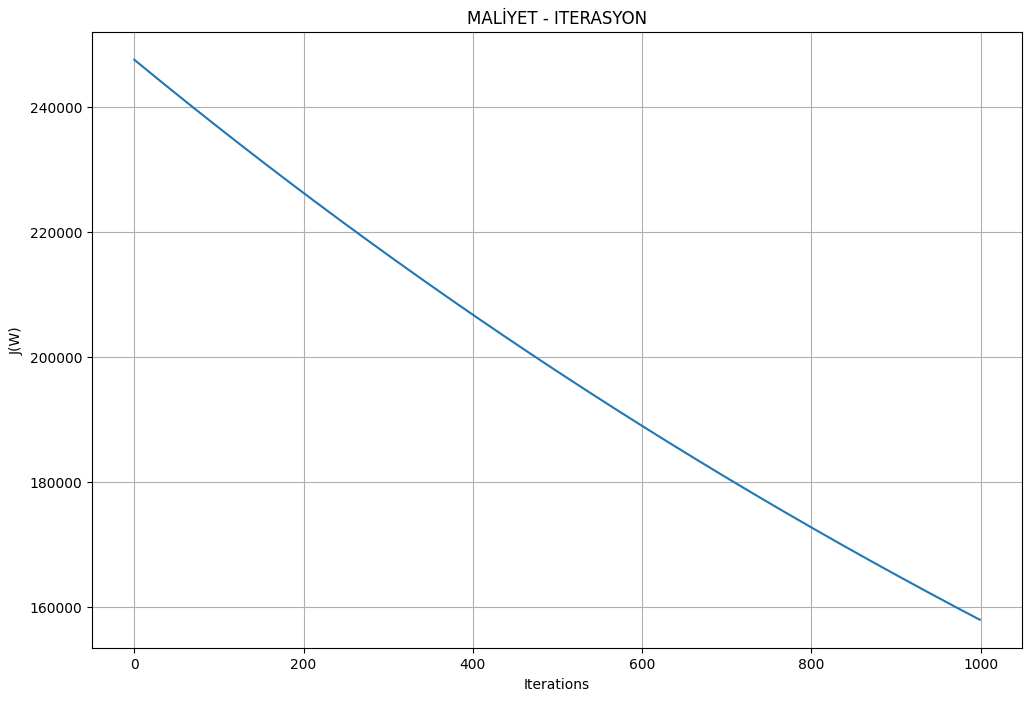

In [33]:
# learning_rate = 0.0001
# n_iter = 1000

learning_rate = 0.0001
n_iter = 1000
call_gradient(learning_rate, n_iter)

**Sonuç:** Çok kötü, çünkü **Final Cost = 404.5** değerine yaklaşamadık daha. Şimdi mecburen iterasyon sayısını artırmamız lazım

**Deney 6:** Iterasyon sayısı artsın (10000) ve Learning rate'i daha da küçültelim **alpha = 0.0001** 

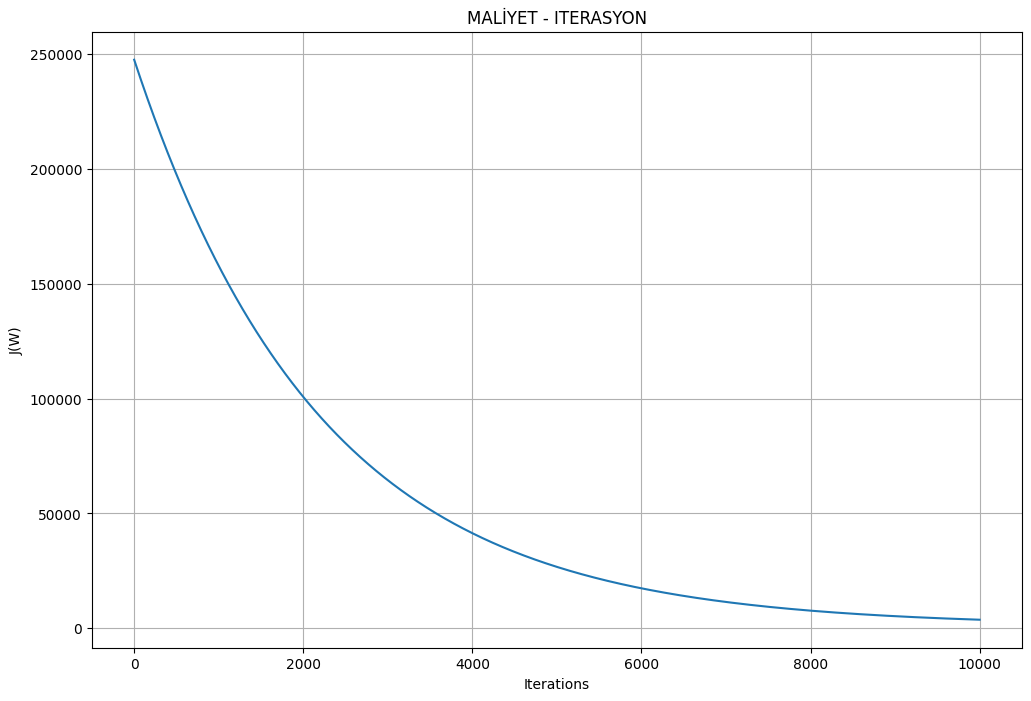

In [34]:
# learning_rate = 0.0001
# n_iter = 10000

learning_rate = 0.0001
n_iter = 10000
call_gradient(learning_rate, n_iter)

**Sonuç:** Şimdi 10000. iterasyonda gerçek maliyete yani **Final Cost = 404.5** yaklaştık.

**ÇIKARIM:**

* Learning Rate çok büyük olursa, Overshoot yaparsınız ve asla minimum Cost değerine yaklaşamazsınız.

* Learning Rate çok küçük olursa, o zaman da adımlarınız çok küçük olacağı için Optimum Cost değerine yaklaşmanız çok uzun sürer (fazla iterasyon)

Otimimum learning rate'i nasıl bileceğiz.

Temel olarak bilemeyiz ama learning rate'i biraz büyük başlatıp giderek küçülten algoritmalar var: **Adam Optimizer.**

### Stochastic Gradient Descent (SGD)

Normal gradient descentte veride sıralı gider ama böyle olunca optimum nokta olmamasına rağmen grafikteki bazı çukurları optimum sanabilir ve yanlış çözüm bulabiliriz. Bu yüzden günlük hayatta pek tercih edilmez onun yerine SGD kullnırız bu veriyi tek seferde almaz her seferinbde parça parça farklı yerlerden alır. Yani verinin içinde random yapacağız.

In [36]:
# Stochastic Gradient Descent Fonksiyonu

def stochastic_gradient_descent(X, y, W, learning_rate=0.01, iterations=100):
    """
    Stochastic Gradient Descent uygulama fonksiyonu.
    Parametreler:
    X = X Matrisi (bias unit eklenmiş hali, yani 1'lerden oluşmuş ilk sütun)
    y = y vektörü
    W = Katsayı vektörü (w'lardan oluşmuş)
    learning_rate = learning rate: alpha (öğrenme katsayısı)
    iterations = toplam döngü sayısı
    Dönüş:
    * W vektörünün son hali
    * Maliyet Listesi (cost history)
    * W vektörünün listesi (weight history)
    """
    
    n = len(y)    
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):        
        cost = 0        
        # her seferinde rasgele bir X_i değeri seçip maliyet hesaplayacağız
        for i in range(n):            
            # rasgele bir değer al
            rand_ind = np.random.randint(0, n)    
            
            X_i = X[rand_ind,:].reshape(1, X.shape[1])            
            y_i = y[rand_ind].reshape(1,1)
        
            # tek X_i için tahmin
            tahmin = np.dot(X_i, W)

            # tek X_i için katsayı değişimi
            W = W - (1/n) * learning_rate * (X_i.T.dot((tahmin - y_i)))
            
            # tek X_i için hesaplanan cost'u cost değişkenine ekle
            cost += cal_cost(W, X_i, y_i)
        
        # bu iterasyon için cost değerini cost_history'ye ekle
        cost_history[it] = cost
    
    return W, cost_history

Tabi bunları tek tek almak yavaş olduğu için gruplar (batch) halinde alacağız. Buna **Mini-Batch** deniyor.

In [37]:
# Mini-Batch Stochastic Gradient Descent Fonksiyonu

def minibatch_stochastic_gradient_descent(X, y, W, learning_rate=0.01, iterations=100, batch_size=20):
    """
    Stochastic Gradient Descent uygulama fonksiyonu.
    Parametreler:
    X = X Matrisi (bias unit eklenmiş hali, yani 1'lerden oluşmuş ilk sütun)
    y = y vektörü
    W = Katsayı vektörü (w'lardan oluşmuş)
    learning_rate = learning rate: alpha (öğrenme katsayısı)
    iterations = toplam döngü sayısı
    Dönüş:
    * W vektörünün son hali
    * Maliyet Listesi (cost history)
    * W vektörünün listesi (weight history)
    """
    
    n = len(y)
    cost_history = np.zeros(iterations)
    # toplam kaç adet batch olacak
    n_batches = int(n / batch_size)
    
    for it in range(iterations):
        cost = 0
        # X ve y'leri karıştır (veri sıraları rasgele olsun) aynı grubun tekrar gelmesini önlüyor
        indices = np.random.permutation(n)
        X = X[indices]
        y = y[indices]
        
        # her seferinde rasgele bir X_i partisi alıp maliyet hesaplayacağız
        for i in range(0, n, batch_size):
            # rasgele X_i ve y_i partileri
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
        
            # bias column ekle (1'ler sütunu)
            x_i = np.c_[np.ones(len(X_i)), X_i]
        
            # X_i partisi için tahmin
            tahmin = np.dot(X_i, W)

            # X_i partisi için katsayı değişimi
            W = W - (1/n) * learning_rate * (X_i.T.dot((tahmin - y_i)))

            # X_i partisi için hesaplanan cost'u cost değişkenine ekle
            cost += cal_cost(W, X_i, y_i)
        
        # bu iterasyon için cost değerini cost_history'ye ekle
        cost_history[it] = cost
    
    return W, cost_history
    